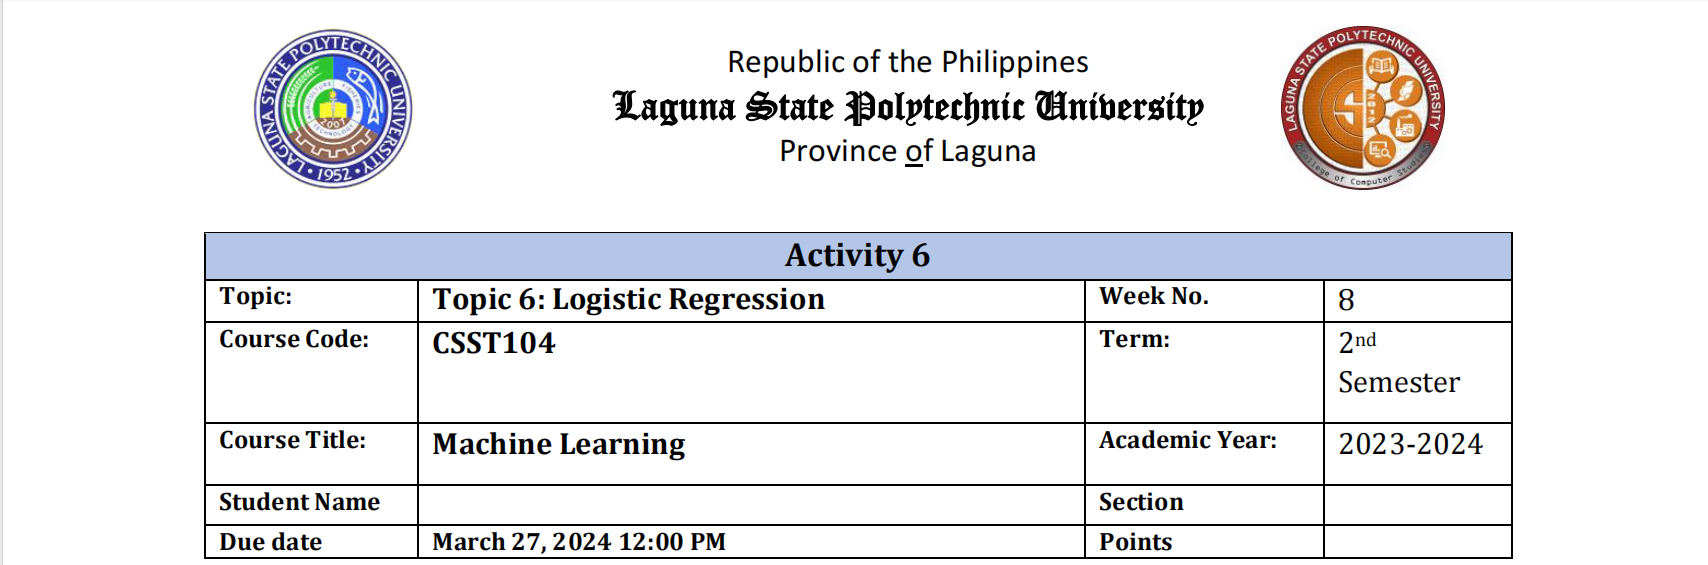

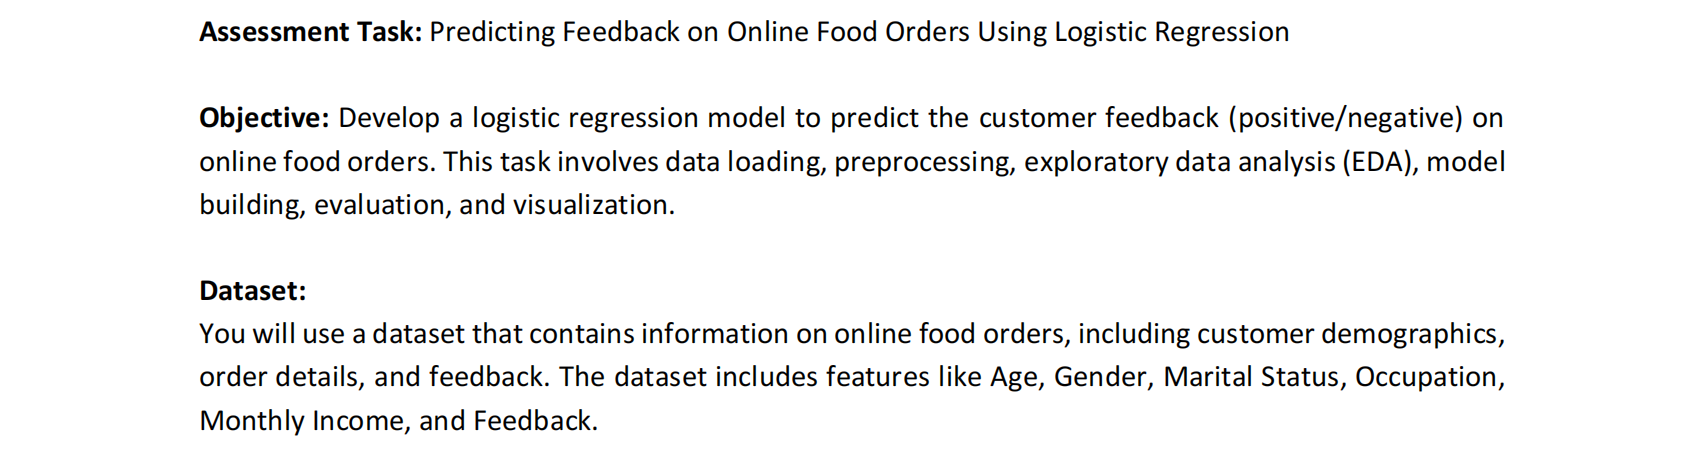

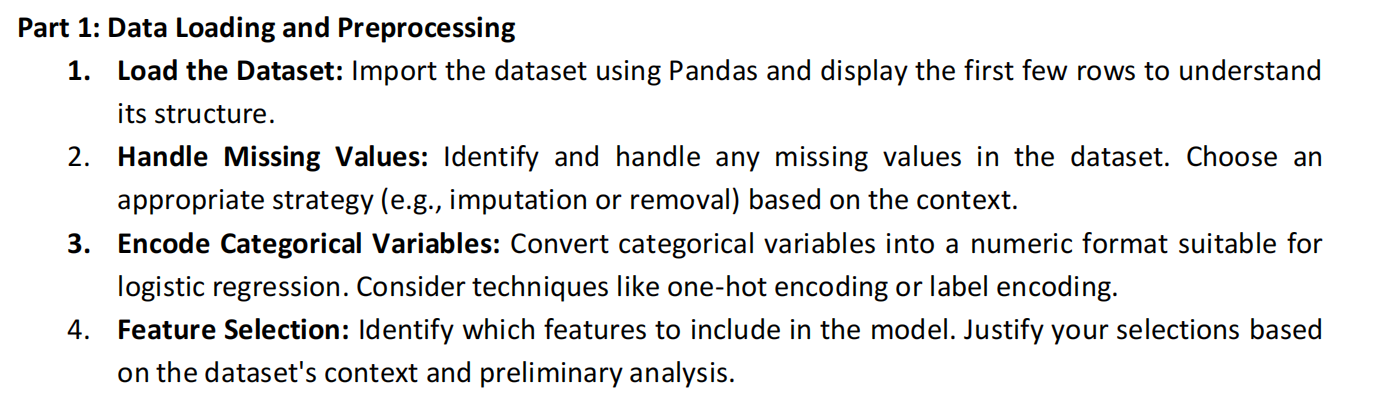

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('onlinefoods.csv')
print(df.head())

print(df.isnull().sum())
columns_list = df.columns.tolist()
print(columns_list)

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [457]:

# Check for and drop any unnecessary columns
if 'Unnamed: 12' in df.columns:
    df = df.drop(columns=['Unnamed: 12'])

# Perform one-hot encoding on selected columns
columns_to_encode = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Feedback']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Get the list of columns after one-hot encoding
columns_list = df_encoded.columns.tolist()

# Print the list of columns
print(columns_list)



['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code', 'Output', 'Gender_Male', 'Marital Status_Prefer not to say', 'Marital Status_Single', 'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School', 'Educational Qualifications_Uneducated', 'Feedback_Positive']


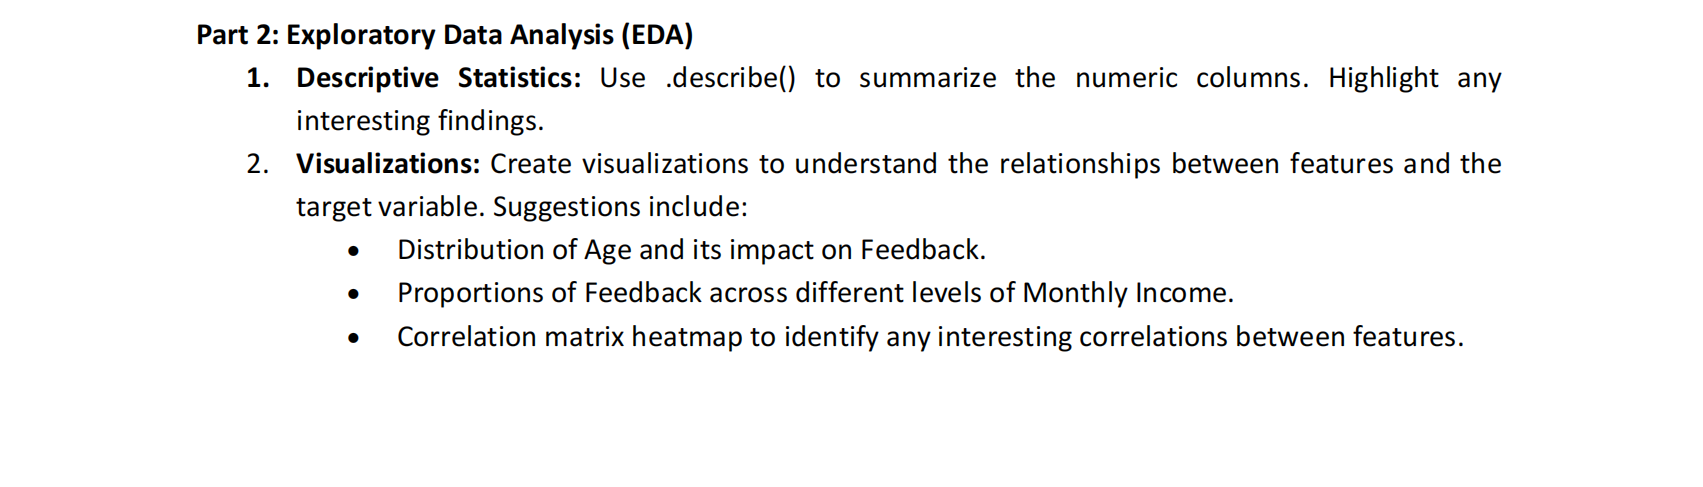

Text(0, 0.5, 'Feedback (Positive)')

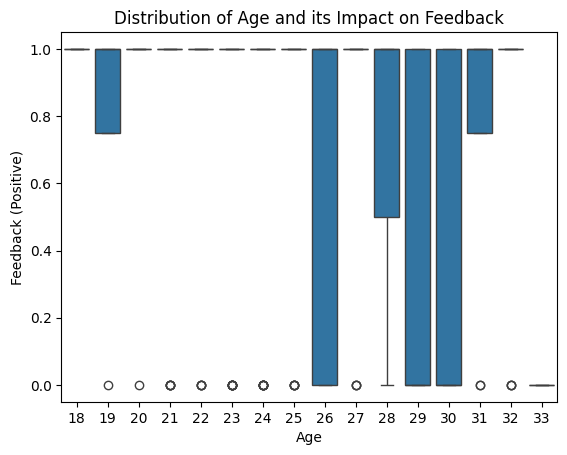

In [458]:
#Age
sns.boxplot(x='Age', y='Feedback_Positive', data=df_encoded)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Feedback (Positive)')

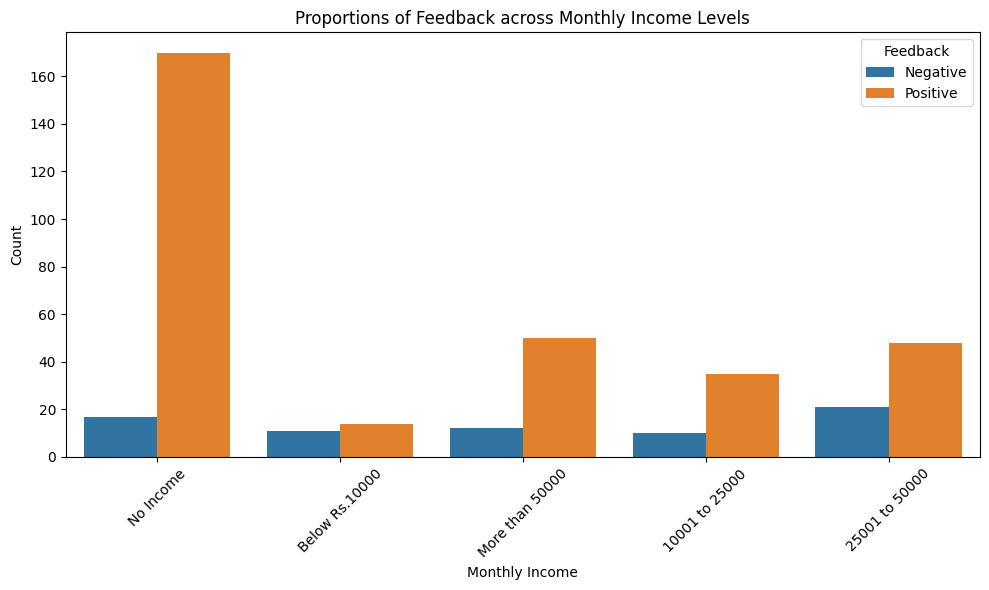

In [459]:
#Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', hue='Feedback_Positive', data=df_encoded)
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-460-1083707493a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


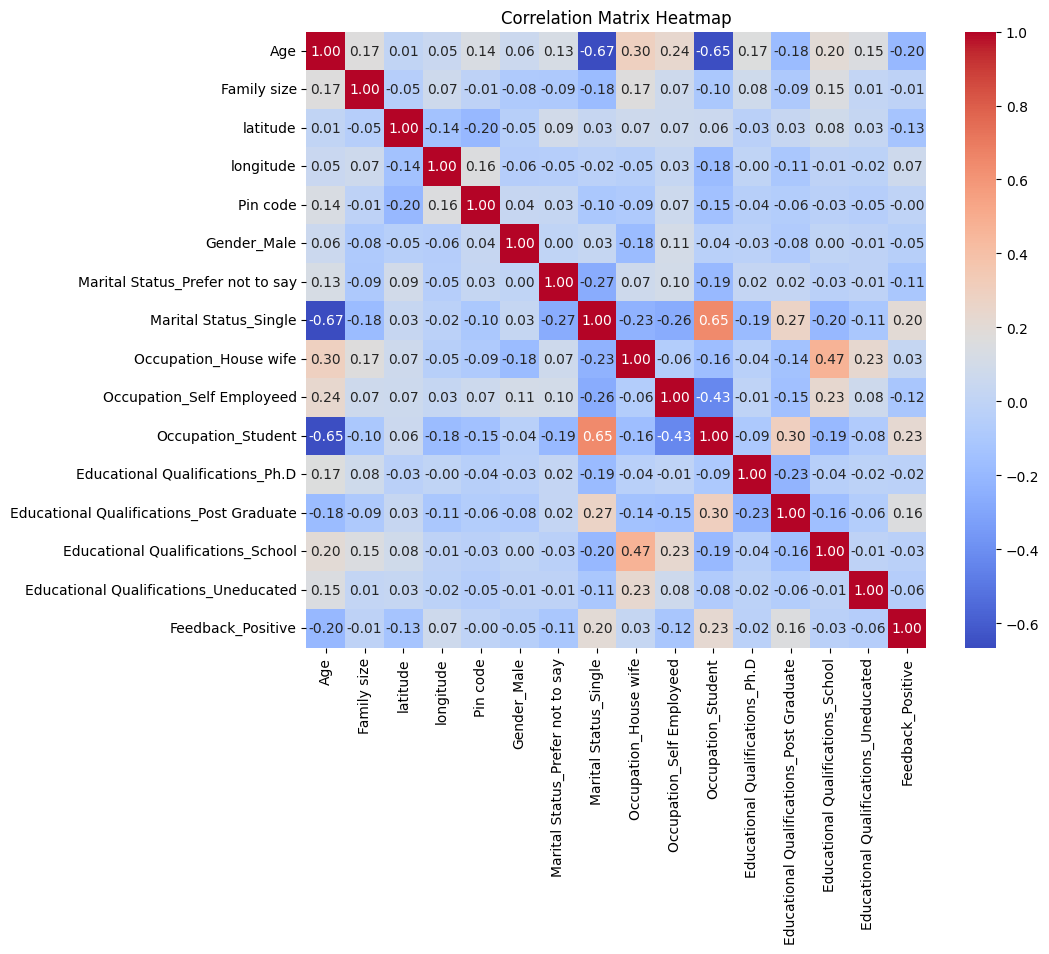

In [460]:
# Correlation matrix heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

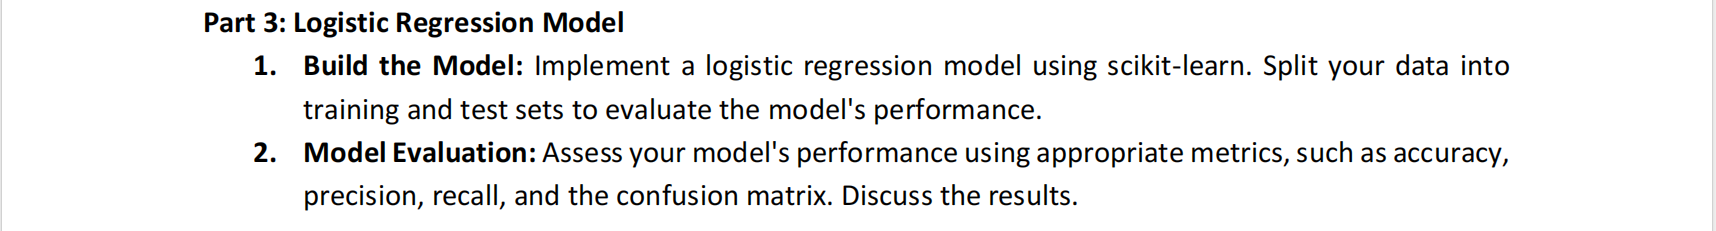

In [461]:

x = df_encoded[['Age','Monthly Income', 'Gender_Male', 'Marital Status_Prefer not to say',
                'Marital Status_Single', 'Occupation_House wife', 'Occupation_Self Employeed',
                'Occupation_Student', 'Educational Qualifications_Ph.D',
                'Educational Qualifications_Post Graduate', 'Educational Qualifications_School',
                'Educational Qualifications_Uneducated', 'Family size', 'Feedback_Positive']]
y = df_encoded['Feedback_Positive']


In [462]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [463]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

In [464]:
model = LogisticRegression()
model.fit(x_train_encoded, y_train)

LogisticRegression()

In [465]:
y_pred = model.predict(x_test_encoded)

In [466]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)

print(f'accuracy: {accuracy}')
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

accuracy: 1.0
Confusion Matrix: 
[[11  0]
 [ 0 67]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        67

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



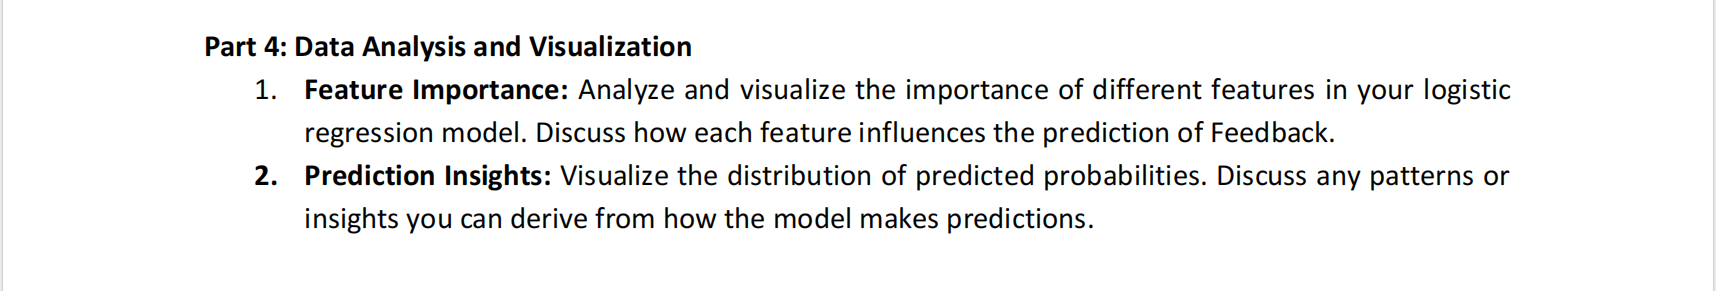

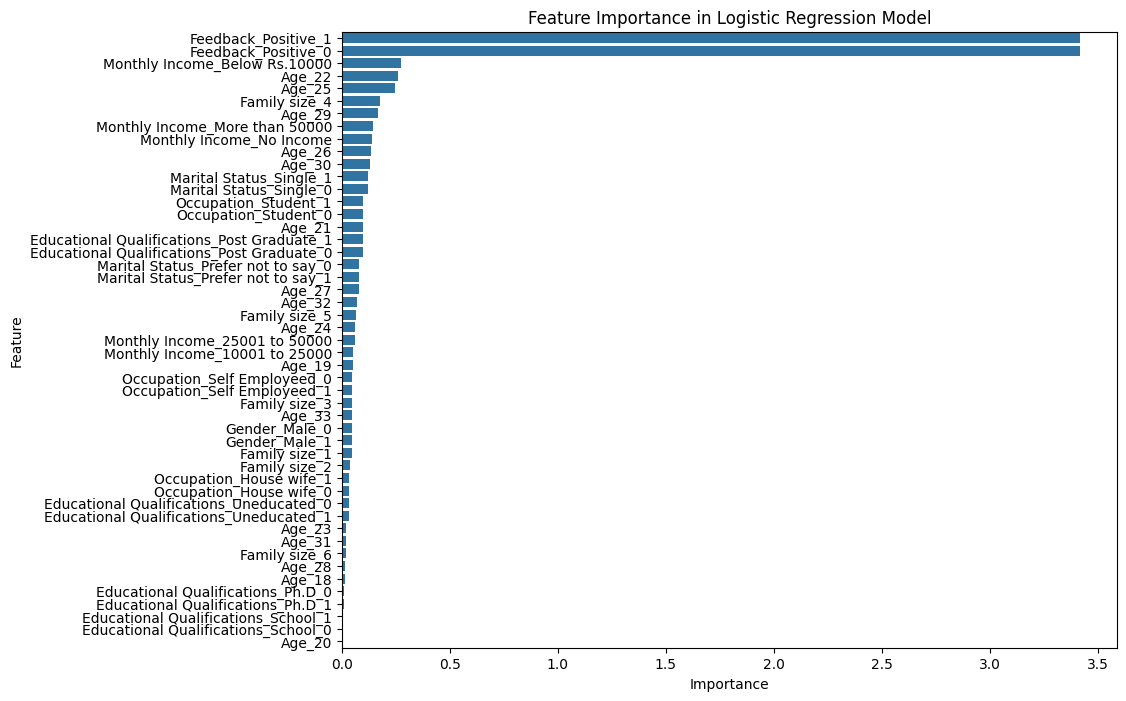

In [471]:
encoded_feature_names = encoder.get_feature_names_out(x.columns)

feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': abs(model.coef_[0])})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#FEature Importance Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


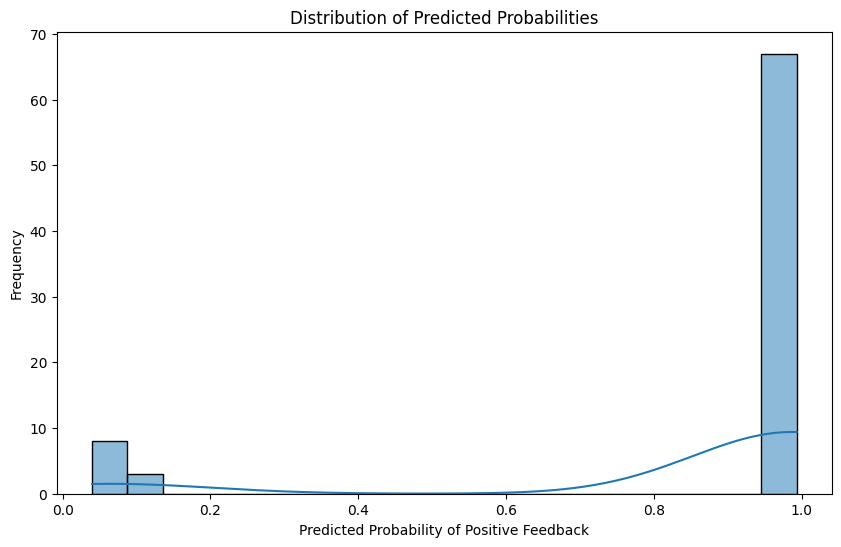

In [472]:
# Get predicted probabilities for the test data
y_pred_prob = model.predict_proba(x_test_encoded)[:, 1]  # Probability of class 1 (Feedback_Positive)

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
